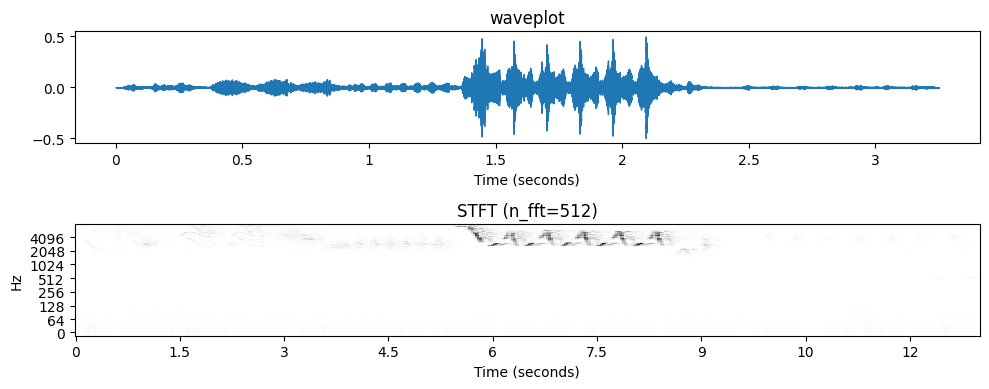

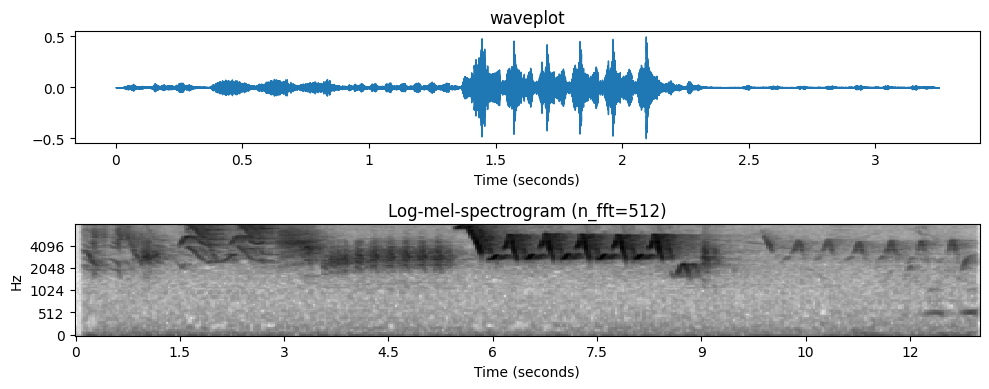

In [2]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import librosa.feature


def plot_stft(signal, n_fft=512):
    plt.figure(figsize=(10, 4))
    # plot signal
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=16000)
    plt.title('waveplot')
    plt.xlabel('Time (seconds)')
    # plot stft in grayscale
    plt.subplot(2, 1, 2)
    D = np.abs(librosa.stft(signal, n_fft=n_fft))
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=16000, cmap='gray_r')
    plt.title('STFT (n_fft={})'.format(n_fft))
    plt.xlabel('Time (seconds)')
    plt.tight_layout()
    plt.show()


def plot_log_mel_spec(signal, n_fft=512):
    plt.figure(figsize=(10, 4))
    # plot signal
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, sr=16000)
    plt.title('waveplot')
    plt.xlabel('Time (seconds)')
    # plot log-mel-spectrogram
    plt.subplot(2, 1, 2)
    D = np.abs(librosa.stft(signal, n_fft=n_fft))
    S = librosa.feature.melspectrogram(S=D, sr=16000, n_fft=n_fft, hop_length=n_fft // 4, n_mels=80)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, x_axis='time', y_axis='mel', sr=16000, cmap='gray_r')
    plt.title('Log-mel-spectrogram (n_fft={})'.format(n_fft))
    plt.xlabel('Time (seconds)')
    plt.tight_layout()
    plt.show()


# read signal:
signal, fs = librosa.load('audio_16k/bird-sing.wav', sr=16000)

plot_stft(signal)
plot_log_mel_spec(signal)

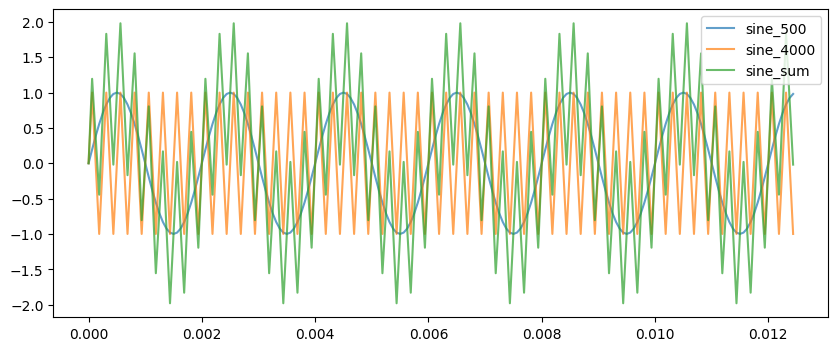

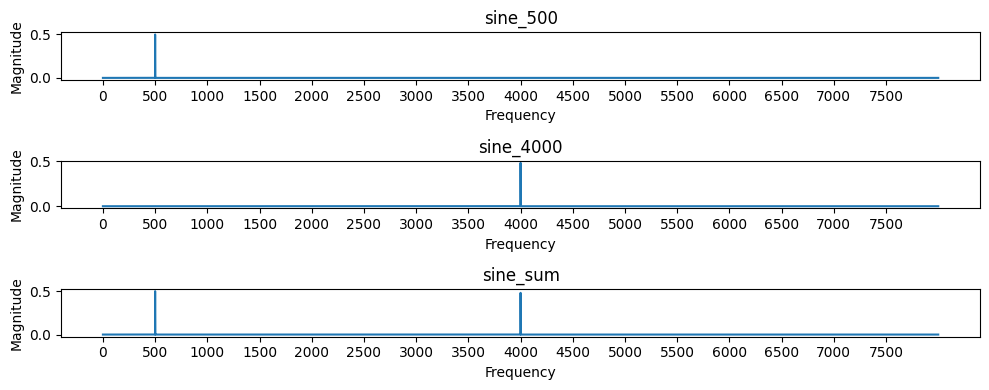

In [61]:
# Create a 500[Hz] sine wave, corresponding to 16[KHz] sampling rate, of 3 seconds length:
fs = 16000
t = np.linspace(0, 3, 3 * fs)
sine_500 = np.sin(2 * np.pi * 500 * t)
sine_4000 = np.sin(2 * np.pi * 4000 * t)
sine_sum = sine_500 + sine_4000
# Plot the first 200 samples of the generated sine waves, and the sum of the generated waves in a single plot,
#  each in a different color. Use alpha = 0.7 to diminish occlusions.
plt.figure(figsize=(10, 4))
plt.plot(t[:200], sine_500[:200], label='sine_500', alpha=0.7)
plt.plot(t[:200], sine_4000[:200], label='sine_4000', alpha=0.7)
plt.plot(t[:200], sine_sum[:200], label='sine_sum', alpha=0.7)
plt.legend()
plt.show()
# plot the fourier transform of the signals, in three different plots:
plt.figure(figsize=(10, 4))
plt.subplot(3, 1, 1)
plt.xticks(np.arange(0, 8000, 500))
plt.magnitude_spectrum(sine_500, Fs=fs)
plt.title('sine_500')
plt.ylabel('Magnitude')
plt.subplot(3, 1, 2)
plt.xticks(np.arange(0, 8000, 500))
plt.magnitude_spectrum(sine_4000, Fs=fs)
plt.title('sine_4000')
plt.ylabel('Magnitude')
plt.subplot(3, 1, 3)
plt.xticks(np.arange(0, 8000, 500))
plt.magnitude_spectrum(sine_sum, Fs=fs)
plt.title('sine_sum')
plt.tight_layout()
plt.ylabel('Magnitude')
plt.show()


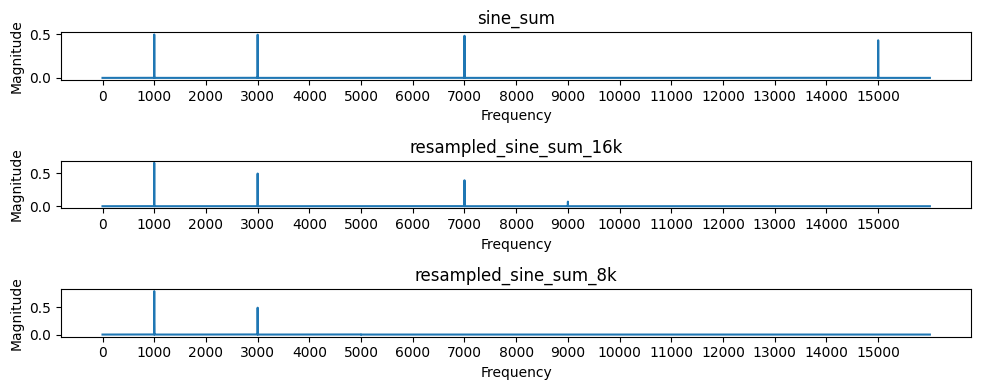

1KHz amplitude in sine_sum: 0.52630318322138
1KHz amplitude in resampled_sine_sum_16k: 12.66714294611169
1KHz amplitude in resampled_sine_sum_8k: 19.126894669794805


In [3]:
# Generate a sine wave corresponding to sum([sine(1000[Hz]), sine(3000[Hz]), sine(7000[Hz]), sine(15000[Hz])]) using a 32[KHz] sampling frequency, with duration of 3 secs:
import torchaudio
import torch

fs = 32000
t = np.linspace(0, 3, 3 * fs)
sine_1000 = np.sin(2 * np.pi * 1000 * t)
sine_3000 = np.sin(2 * np.pi * 3000 * t)
sine_7000 = np.sin(2 * np.pi * 7000 * t)
sine_15000 = np.sin(2 * np.pi * 15000 * t)

sine_sum = sine_1000 + sine_3000 + sine_7000 + sine_15000


def resample(signal, new_fs, old_fs):
    resampler = torchaudio.transforms.Resample(old_fs, new_fs)
    signal_torch = torch.tensor(signal.astype(np.float32)).unsqueeze(0)
    resampled_signal = resampler(signal_torch).squeeze(0).numpy()
    return resampled_signal


naive_sine_sum_16k = sine_sum[::2]
naive_sine_sum_8k = sine_sum[::4]

# Use torchaudio.transforms.Resample to artificially resume 32[KHz] sampling frequency for the downsampled signals
#  (this is to ensure that your fft plots would contain spectral frequencies ranging from 0-16k, why is that?).
resampled_sine_sum_16k = resample(naive_sine_sum_16k, 32000, 16000)
resampled_sine_sum_8k = resample(naive_sine_sum_8k, 32000, 8000)

# Observe the FFT plots of the generated signals, do you see any phenomena occuring? describe the phenomena.
#  why is this happening? explain.
plt.figure(figsize=(10, 4))
plt.subplot(3, 1, 1)
plt.xticks(np.arange(0, 16000, 1000))
spec, freq, _ = plt.magnitude_spectrum(sine_sum, Fs=fs)
plt.title('sine_sum')
plt.ylabel('Magnitude')
plt.subplot(3, 1, 2)
plt.xticks(np.arange(0, 16000, 1000))
plt.magnitude_spectrum(resampled_sine_sum_16k, Fs=fs)
plt.title('resampled_sine_sum_16k')
plt.ylabel('Magnitude')
plt.subplot(3, 1, 3)
plt.xticks(np.arange(0, 16000, 1000))
plt.magnitude_spectrum(resampled_sine_sum_8k, Fs=fs)
plt.title('resampled_sine_sum_8k')
plt.tight_layout()
plt.ylabel('Magnitude')
plt.show()

# print the amplitude of the 1KHz frequency in all the signals:
print(f'1KHz amplitude in sine_sum: {np.abs(np.fft.fft(sine_sum))[1000]}')
print(f'1KHz amplitude in resampled_sine_sum_16k: {np.abs(np.fft.fft(resampled_sine_sum_16k))[1000]}')
print(f'1KHz amplitude in resampled_sine_sum_8k: {np.abs(np.fft.fft(resampled_sine_sum_8k))[1000]}')




In [1]:
from glob import glob
import scipy.signal


# for file_path in glob('phone_digits_8k/*.wav'):
#     # load the file
#     signal, fs = torchaudio.load(file_path)
#     signal = signal.squeeze(0).numpy()
#     # plot the fft of the signals:
#     plt.figure(figsize=(10, 4))
#     plt.subplot(2, 1, 1)
#     plt.magnitude_spectrum(signal, Fs=fs)
#     plt.title(f'{file_path}')
#     plt.ylabel('Magnitude')

class DigitClassifier():
    def __init__(self):
        self.digit_peaks = {}
        self.init_dict()

    def init_dict(self):
        # Read the files from the folder phone_digits_8k and make a dictionary which maps each digit to its 2 highest peaks.
        #  The dictionary should look like this: {digit: [peak1, peak2], ...}
        #  where each peak is a tuple of (frequency, amplitude).
        for file_path in glob('phone_digits_8k/*.wav'):
            # load the file
            digit = file_path.split('_')[-1]
            if len(digit) == 5:
                digit = digit[0]
            else:
                digit = digit[0:2]
            signal, fs = librosa.load(file_path, sr=8000)
            signal_f = np.fft.fft(signal)
            peaks, properties = scipy.signal.find_peaks(signal_f, height=0.1)
            zipped_peaks_heights = zip(peaks, properties['peak_heights'])
            zipped_peaks_heights = sorted(zipped_peaks_heights, key=lambda x: x[1], reverse=True)[:2]
            self.digit_peaks[digit] = zipped_peaks_heights

    def __classify_digit(self, expected_digit, signal):
        signal_f = np.fft.fft(signal)
        peaks, properties = scipy.signal.find_peaks(signal_f, height=0.1)
        zipped_peaks_heights = zip(peaks, properties['peak_heights'])
        zipped_peaks_heights = sorted(zipped_peaks_heights, key=lambda x: x[1], reverse=True)[:2]
        for k, v in self.digit_peaks.items():
            # todo change to nearest neighbor
            if v[0] == zipped_peaks_heights[0] and  v[1] == zipped_peaks_heights[1]:
                print(f'expected_digit : {expected_digit} , classified_digit: {k}')
                return k
        return -1



    def classify_digits(self):
        for file_path in glob('phone_digits_8k/*.wav'):
            # load the file
            digit = file_path.split('_')[-1]
            if len(digit) == 5:
                digit = digit[0]
            else:
                digit = digit[0:2]
            signal, fs = librosa.load(file_path, sr=8000)
            self.__classify_digit(digit, signal)


digit_classifier = DigitClassifier()
digit_classifier.classify_digits()










NameError: name 'librosa' is not defined